### 카테고리 분포 (Categorical distribution)

1) 정의

- 베르누이 분포의 확장판 (0, 1만 있는게 아니라 0, 1, 2, 3,..)
- 주사위라고 생각 (1, 2, 3, 4, 5, 6) $\rightarrow$ 클래스 수(K) = 6

2) 표기법 : One-Hot-Encoding 

[1] 정의 : 1, 0을 이용해 벡터로 표시

$$ 
\begin{eqnarray}
x = 1  \;\; & \rightarrow & \;\; x = (1, 0, 0, 0, 0, 0) \\
x = 2  \;\; & \rightarrow & \;\; x = (0, 1, 0, 0, 0, 0) \\
x = 3  \;\; & \rightarrow & \;\; x = (0, 0, 1, 0, 0, 0) \\
x = 4  \;\; & \rightarrow & \;\; x = (0, 0, 0, 1, 0, 0) \\
x = 5  \;\; & \rightarrow & \;\; x = (0, 0, 0, 0, 1, 0) \\
x = 6  \;\; & \rightarrow & \;\; x = (0, 0, 0, 0, 0, 1) \\
\end{eqnarray}
$$

[2] 조건

- $ x_i = \begin{cases} 0 \\ 1 \end{cases} \;\rightarrow$ (0, 1만 가능)


- $ \sum_{k=1}^K x_k = 1 \;\rightarrow$ (K중 하나만 1)

[3] 특징

- 각각의 원소 값 $x_k$는 일종의 베르누이 확률 분포로 볼 수 있음

- 따라서 1이 나올 확률 나타내는 모수 모수 $\theta_k$를 가짐

$$ \theta = ( \theta_1, \cdots , \theta_K )\; ,\;\;\;  (0 \leq \theta_i \leq 1,\;\; \sum_{k=1}^K \theta_k = 1) $$

3) 표기

[1] 카테고리 분포 표기

- $\text{Cat}(x_1, x_2, \dots, x_K;\theta_1, \dots, \theta_K)$

- 출력 벡터 $x=(x_1, x_2, \dots, x_K)^T$, 모두 벡터 $\theta=(\theta_1, \dots, \theta_K)^T$ 활용 $\rightarrow$ $ \text{Cat}(x;\theta) $

[2] 함수 표기

$$ 
\text{Cat}(x;\theta) = 
\begin{cases}
\theta_1 & \text{if } x = (1, 0, 0, \cdots, 0) \\
\theta_2 & \text{if } x = (0, 1, 0, \cdots, 0) \\
\theta_3 & \text{if } x = (0, 0, 1, \cdots, 0) \\
\vdots & \vdots \\
\theta_K & \text{if } x = (0, 0, 0, \cdots, 1) \\
\end{cases}
$$

$$ \text{Cat}(x;\theta) = \theta_1^{x_1} \theta_2^{x_2}  \cdots \theta_K^{x_K}  =  \prod_{k=1}^K \theta_k^{x_k} $$

4) 모멘트

[1] 기대값

$$\text{E}[x_k] = \theta_k$$

[2] 분산

$$\text{Var}[x_k] = \theta_k(1-\theta_k)$$

In [1]:
# 카테고리 분포 시뮬레이션
import scipy as sp
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

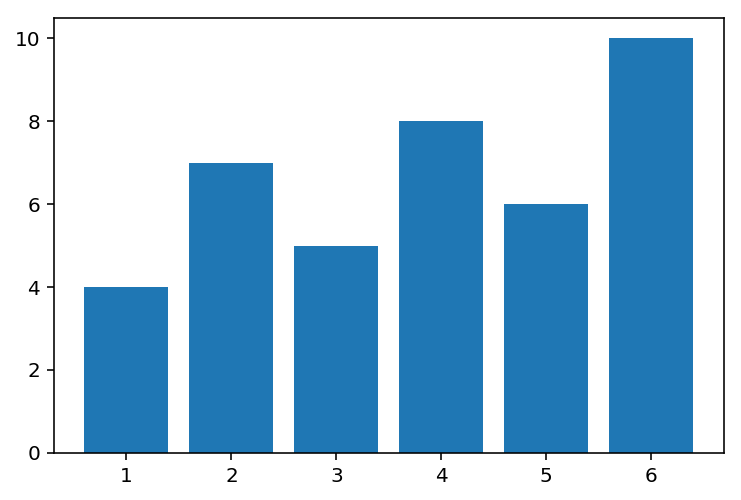

In [2]:
np.random.seed(0)
theta = np.array([1/6]*6) # 길의 6인 벡터 생성

X = np.random.multinomial(2, theta, size=20) # 합이 1로 이루어진 벡터를 20개 생성
plt.bar(np.arange(1, 7), X.sum(axis=0), align="center")
plt.show() # 각 숫자별 빈도 파악

In [3]:
# 이론과 시뮬레이션 비교
df = pd.DataFrame({"theoretic": theta, "simulation": X.mean(axis=0)}).stack()
df = df.reset_index()
df.columns = ["value", "type", "ratio"]
df # 데이터 프레임 생성

,value,type,ratio
0,0,simulation,0.200000
1,0,theoretic,0.166667
2,1,simulation,0.350000
3,1,theoretic,0.166667
4,2,simulation,0.250000
5,2,theoretic,0.166667
6,3,simulation,0.400000
7,3,theoretic,0.166667
8,4,simulation,0.300000
9,4,theoretic,0.166667


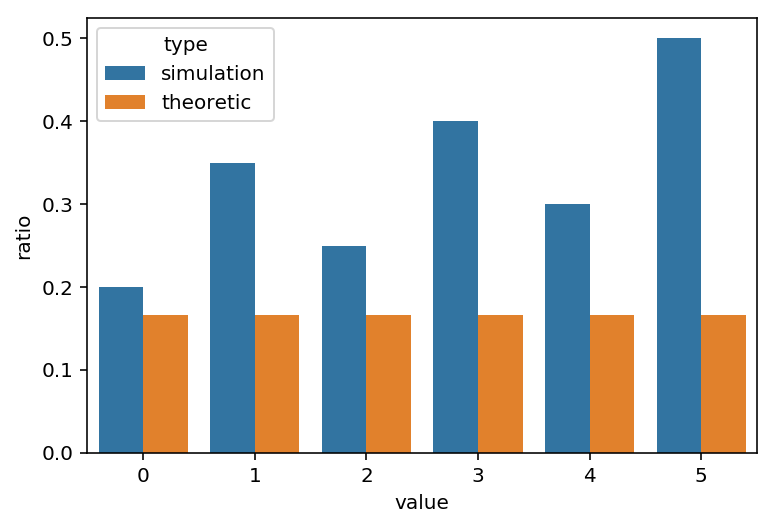

In [4]:
sns.barplot(x="value", y="ratio", hue="type", data=df)
plt.show()

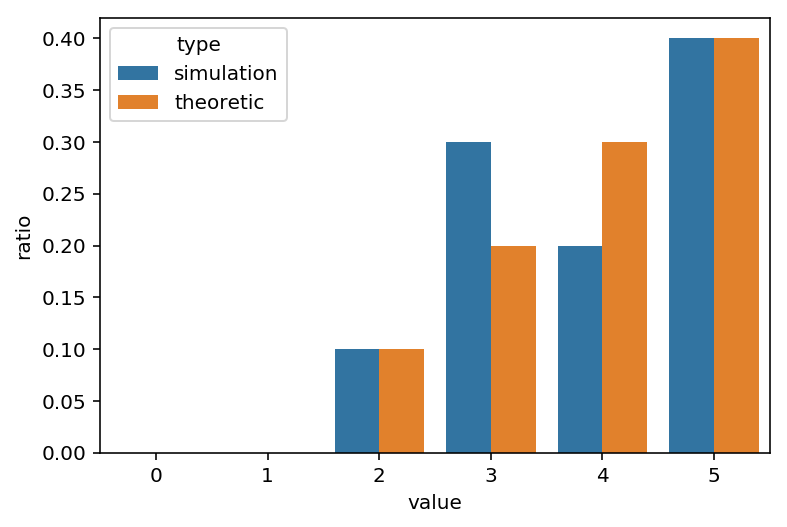

In [5]:
# theta를 다른 값으로 지정해보기
np.random.seed(0)
theta = np.array([0, 0, 0.1, 0.2, 0.3, 0.4]) # theta 비율을 조정
X = np.random.multinomial(1, theta, size=20)

df = pd.DataFrame({"theoretic": theta, "simulation": X.mean(axis=0)}).stack()
df = df.reset_index()
df.columns = ["value", "type", "ratio"]

sns.barplot(x="value", y="ratio", hue="type", data=df)
plt.show()